In [173]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [174]:
df = pd.read_csv('trip.csv', error_bad_lines=False)



b'Skipping line 50794: expected 12 fields, saw 20\n'


In [175]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [176]:
# The average time a person rides uses the bike share is around 20 minutes.
df['tripduration'].describe()

count    286857.000000
mean       1178.295675
std        2038.458947
min          60.008000
25%         387.924000
50%         624.842000
75%        1118.466000
max       28794.398000
Name: tripduration, dtype: float64

In [177]:
dfduration = df['tripduration']

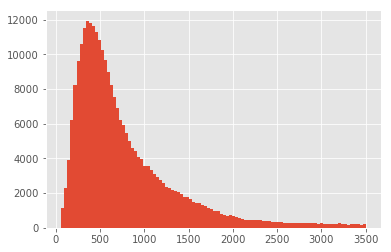

In [178]:
dfduration[dfduration <= 3500].hist(bins=100);

In [179]:
# How many trips are above 1 hour?
# What is the mean trip duration above 1 hour?
print ((dfduration > 3600).sum())
print((dfduration > 3600).mean())

15930
0.0555328961817


There are 15930 or 5% of trips that have a duration above an hour.

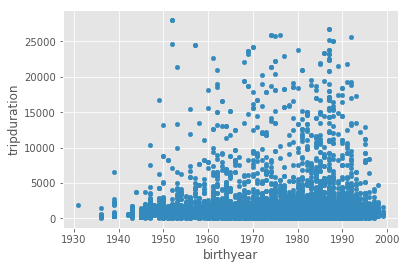

In [181]:
# is there a correlation with age and duration of trips?
# There's no strong correlation between age and trip duration
df.plot(kind='scatter', x='birthyear', y='tripduration')


In [182]:
df.loc[df['gender'] == 'Male', 'gender'] = 1


In [183]:
df.loc[df['gender'] == 'Female', 'gender'] = 0


# Station Data

In [184]:
dfstation = pd.read_csv('station.csv')


In [185]:
dfstation.head(4)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN


In [186]:
dfstation.groupby('install_dockcount')['name'].describe()

,count,unique,top,freq
install_dockcount,,,,
12,5,5,Burke Museum / E Stevens Way NE & Memorial Way NE,1
14,1,1,2nd Ave & Blanchard St,1
16,16,16,UW Magnuson Health Sciences Center Rotunda / C...,1
18,24,24,Eastlake Ave E & E Allison St,1
20,10,10,2nd Ave & Spring St,1
28,1,1,Cal Anderson Park / 11th Ave & Pine St,1
30,1,1,Children's Hospital / Sandpoint Way NE & 40th ...,1


In [187]:
dfstation.groupby('name').install_dockcount.min()

name
12th Ave & E Denny Way                                                    16
12th Ave & E Mercer St                                                    16
12th Ave & E Yesler Way                                                   16
12th Ave & NE Campus Pkwy                                                 16
15th Ave E & E Thomas St                                                  16
15th Ave NE & NE 40th St                                                  18
1st Ave & Marion St                                                       20
2nd Ave & Blanchard St                                                    14
2nd Ave & Pine St                                                         18
2nd Ave & Spring St                                                       20
2nd Ave & Vine St                                                         16
3rd Ave & Broad St                                                        18
6th Ave & Blanchard St                                                 